# 1. Business Problem:

We are looking at a subscription model business for a bank where subscription is the primary source of revenue with different sources.
The companies try to minimize the customer churn - Cancel subscription to retain their customers. In this business problem, we will
look into customer behavior pattern to know the disengagement pattern with the product

## 1.1 Problem statement


The object is to know which users are like to cancel the subscription. It will help to focus on re-engaging these users with the product.
It can be a generic e-mail to explain the benefits of products, focus on user value. We need to careful to only connect with users who will stay with reminder, not leave after the reminder.


## 1.2 Source

Data is shared for learning and doesn't reperesnt real customer in any form

## 1.3 Business objective / Constraints

- Cost of misclassification (churn or not churn) is high
- No strict Latency 
- Interpretability is important for Marketing / Product Managers

----------------

# 2. Machine Learning Problem 

As it is clear, we would like to use ML in this business problem.

## 2.1 Type of Machine Learning Problem

It is a classic case of classification problem - to be precise, it's a case of binary classification. 

## 2.2 Performance metrics

We would like to be measure how accuracte is our model and also how precise it is. Mainly, Would like to see <b>F-1 Score</b> as metrics

## 2.3 Data

In [3]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

dataset = pd.read_csv('churn_data.csv') 

In [2]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


### 2.3.1 Data Column details

- userid - MongoDB userid
- churn  - Active = No | Suspended < 30 = No Else Churn = Yes
- age - age of the customer
- city - city of the customer
- state- state where the customer lives
- postal_code - zip code of the customer
- zodiac_sign- zodiac sign of the customer
- rent_or_own - Does the customer rents or owns a house 
- more_than_one_mobile_device - does the customer use more than one mobile device
- payFreq- Pay Frequency of the cusomter
- in_collections - is the customer in collections
- loan_pending - is the loan pending
- withdrawn_application - has the customer withdrawn the loan applicaiton 
- paid_off_loan- has the customer paid of the loan
- did_not_accept_funding - customer did not accept funding
- cash_back_engagement - Sum of cash back dollars received by a customer / No of days in the app
- cash_back_amount - Sum of cash back dollars received by a customer
- used_ios- Has the user used an iphone
- used_android - Has the user used a android based phone
- has_used_mobile_and_web - Has the user used mobile and web platforms
- has_used_web - Has the user used MoneyLion Web app
- has_used_mobile - as the user used MoneyLion  app
- has_reffered- Has the user referred
- cards_clicked - How many times a user has clicked the cards
- cards_not_helpful- How helpful was the cards
- cards_helpful- How helpful was the cards
- cards_viewed- How many times a user viewed the cards
- cards_share- How many times a user shared his cards
- trivia_view_results-How many times a user viewed trivia results
- trivia_view_unlocked- How many times a user viewed trivia view unlocked screen
- trivia_view_locked - How many times a user viewed trivia view locked screen
- trivia_shared_results- How many times a user shared trivia results 
- trivia_played - How many times a user played trivia 
- re_linked_account- Has the user re linked account
- un_linked_account - Has the user un linked account
- credit_score - Customer's credit score

----------------------------------------------

# 4. Exploration Data Analysis (EDA)

In [3]:
# Viewing the Data

dataset.head(5)

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
## Data columns
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
## Data describe
dataset.describe() 

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [4]:
# Cleaning Data
dataset[dataset.credit_score < 300]
dataset = dataset[dataset.credit_score >= 300]

In [5]:
# Removing NaN
dataset.isna().any()
dataset.isna().sum()
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [6]:
dataset2 = dataset.drop(columns = ['user', 'churn'])

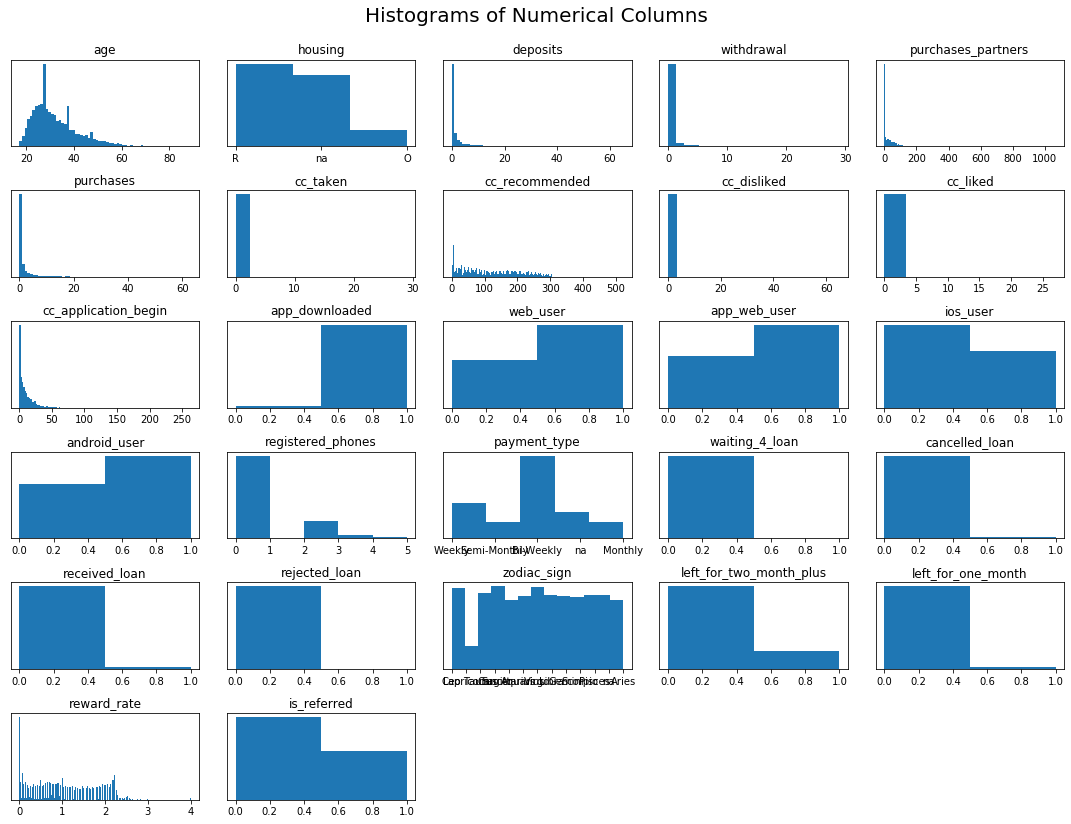

In [8]:
## Histograms
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

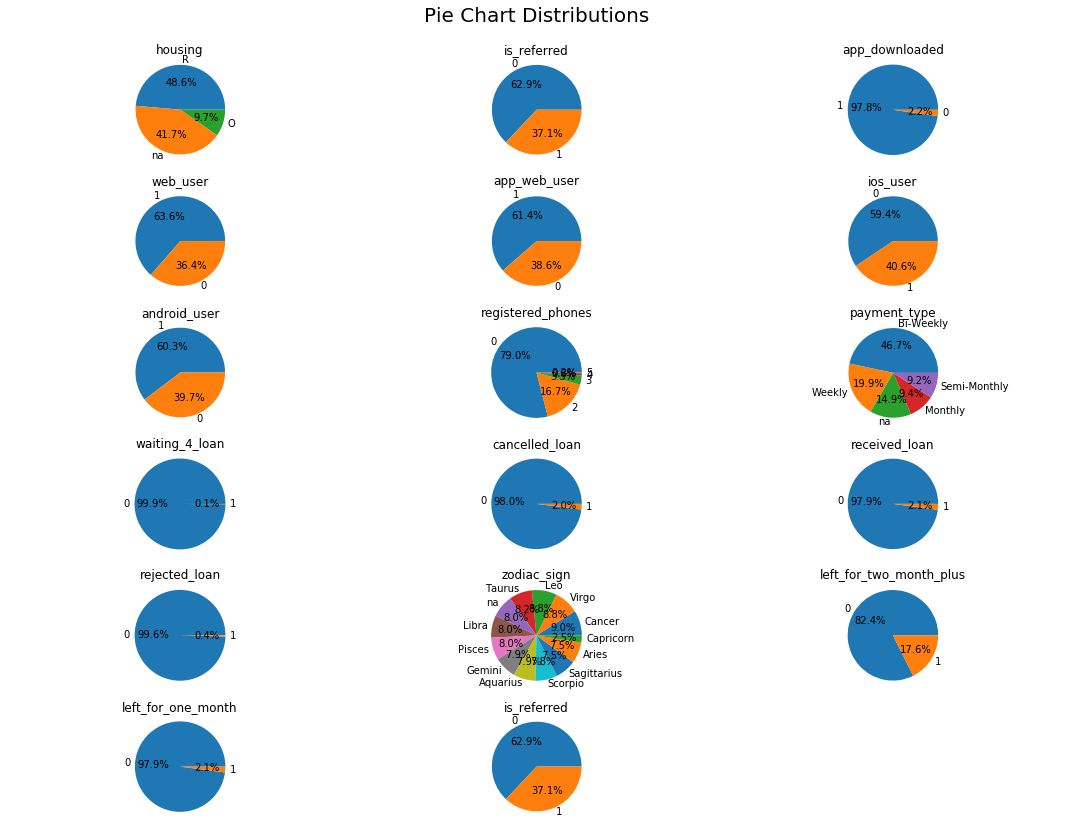

In [19]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [7]:
# Uneven features
df1= (dataset[dataset2.waiting_4_loan == 1].churn.value_counts()).to_frame()
df1["Name"] = 'waiting_4_loan'

df2= (dataset[dataset2.cancelled_loan == 1].churn.value_counts()).to_frame()
df2["Name"] = 'cancelled_loan'

df3= (dataset[dataset2.received_loan == 1].churn.value_counts()).to_frame()
df3["Name"] = 'received_loan'


df4= (dataset[dataset2.rejected_loan == 1].churn.value_counts()).to_frame()
df4["Name"] = 'rejected_loan'

df5= (dataset[dataset2.left_for_one_month == 1].churn.value_counts()).to_frame()
df5["Name"] = 'left_for_one_month'

df = pd.concat([df1, df2, df3, df4, df5])
df.reset_index(level=0, inplace=True)

df.columns = ['Churn_index', 'Churn_Count', 'Features']

<Figure size 432x288 with 0 Axes>

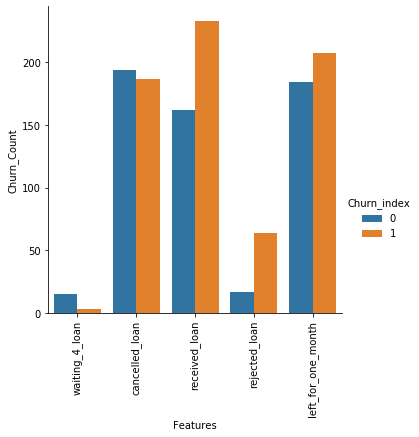

In [11]:
## Visualize Uneven Features
fig = plt.figure()
g = sns.factorplot(x = 'Features', y='Churn_Count', hue = 'Churn_index',data=df, kind='bar')
g.set_xticklabels(rotation=90)
plt.show()

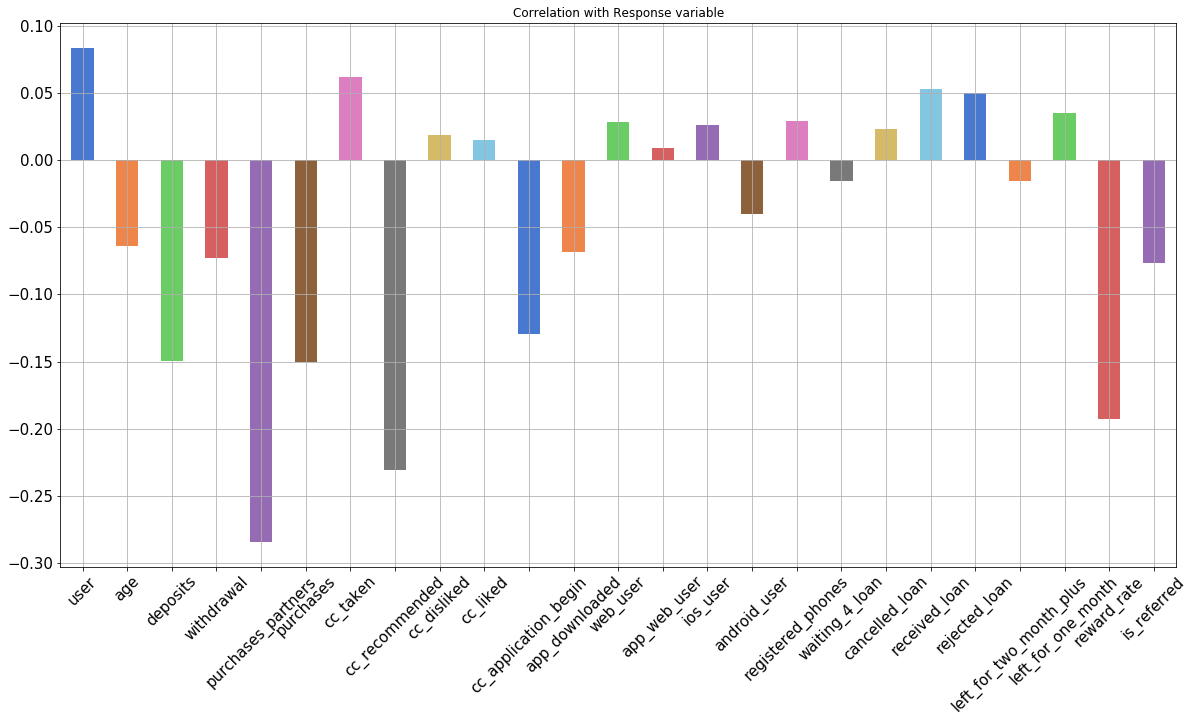

In [12]:
## Correlation with Response Variable
dataset.drop(columns = ['housing', 'payment_type',
                         'churn', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              color = sns.color_palette("muted"),                          
              grid = True)

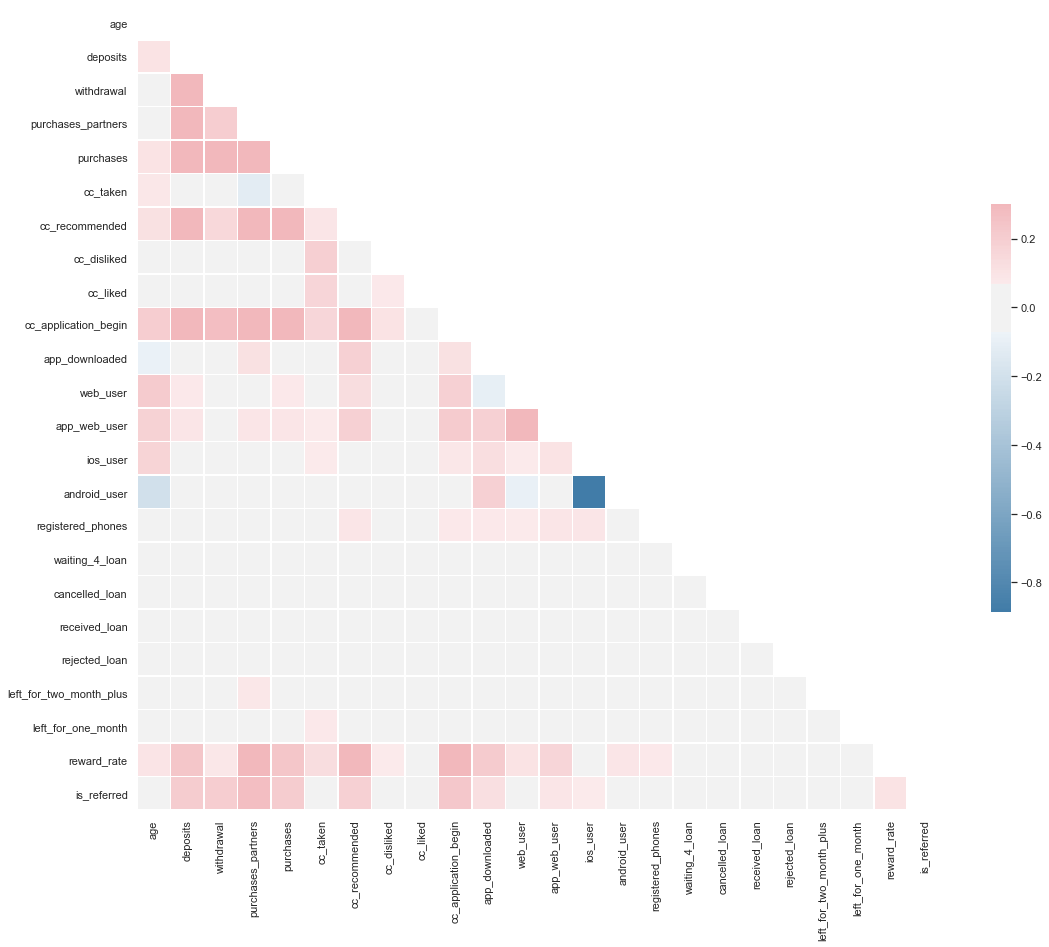

In [15]:
# Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10,n =9,  sep=20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [16]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])

Note: Although there are somewhat correlated fields, they are not colinearThese feature are not functions of each other, so they won't break the model. But these feature won't help much either. Feature Selection should remove them.

----------------------

# 4 Machine Learning 

# 4.1 Data

### Importing Libraries ####

In [17]:
#### Importing Libraries ####

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Data Preparation

In [18]:
## Data Preparation
user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [19]:
dataset.housing.value_counts()

R     9221
na    7910
O     1834
Name: housing, dtype: int64

In [20]:
dataset.groupby('housing')['churn'].nunique().reset_index()

,housing,churn
0,O,2
1,R,2
2,na,2


In [21]:
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [22]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [23]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo'],
      dtype='object')

### Training and Test Split set

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)



In [25]:
# Balancing the Training Set
y_train.value_counts()

0    8934
1    6238
Name: churn, dtype: int64

In [26]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

In [27]:
if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

In [28]:

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)

new_indexes = np.concatenate((lower, higher))

In [29]:

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

### Feature Scaling

In [30]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

### Generic Function to call Grid Search with multiple classifier

In [40]:
from sklearn.metrics import confusion_matrix

In [95]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [96]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # calculate f1-score of the model
    f1_score = metrics.f1_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['f1_score'] = f1_score
    print('---------------------')
    print('|      f1_score      |')
    print('---------------------')
    print('\n    {}\n\n'.format(f1_score))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(9,9))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results
    
    

In [97]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


In [98]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

In [99]:
labels = ['No', 'Yes']

### Logistic Regression

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:    7.3s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:07.655025


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.001999


---------------------
|      Accuracy      |
---------------------

    0.6430266279989454


---------------------
|      f1_score      |
---------------------

    0.6414194915254238


--------------------
| Confusion Matrix |
--------------------

 [[1228  999]
 [ 355 1211]]


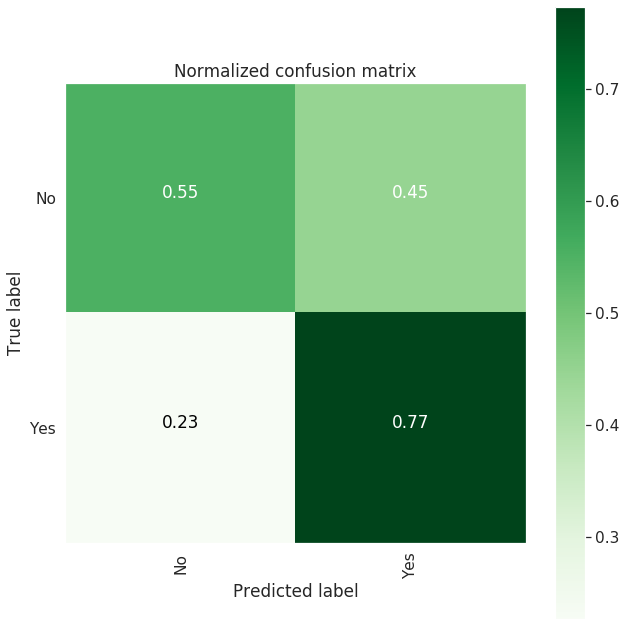

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.78      0.55      0.64      2227
           1       0.55      0.77      0.64      1566

    accuracy                           0.64      3793
   macro avg       0.66      0.66      0.64      3793
weighted avg       0.68      0.64      0.64      3793



In [100]:
# start Grid search
import warnings
warnings.filterwarnings('ignore')

parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [101]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.1, 'penalty': 'l1'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.6550176338570054



### Linear SVC

In [103]:
from sklearn.svm import LinearSVC

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   13.1s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:16.869027


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.000971


---------------------
|      Accuracy      |
---------------------

    0.6353809649354073


---------------------
|      f1_score      |
---------------------

    0.6349960411718131


--------------------
| Confusion Matrix |
--------------------

 [[1207 1020]
 [ 363 1203]]


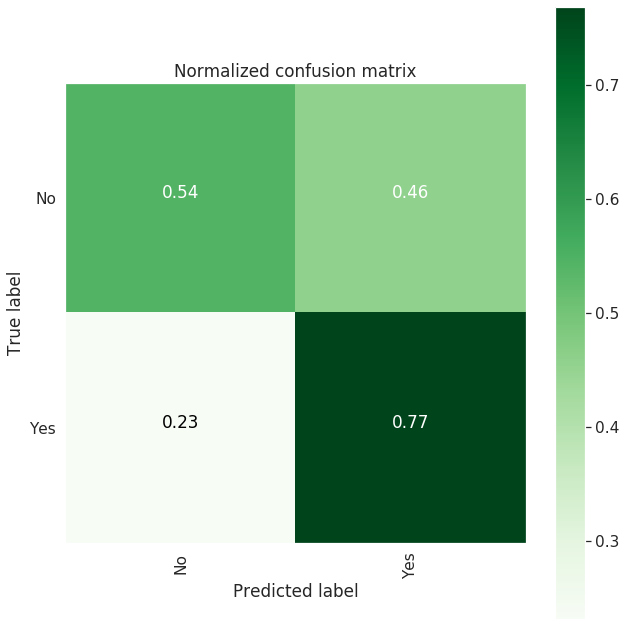

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.54      0.64      2227
           1       0.54      0.77      0.63      1566

    accuracy                           0.64      3793
   macro avg       0.65      0.66      0.64      3793
weighted avg       0.67      0.64      0.64      3793



In [104]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC()
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [57]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=0.125, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 0.125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.6533344020519397



### Kernal SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:44.801175


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.137951


---------------------
|      Accuracy      |
---------------------

    0.4932770893751648


---------------------
|      f1_score      |
---------------------

    0.6022350993377484


--------------------
| Confusion Matrix |
--------------------

 [[ 416 1811]
 [ 111 1455]]


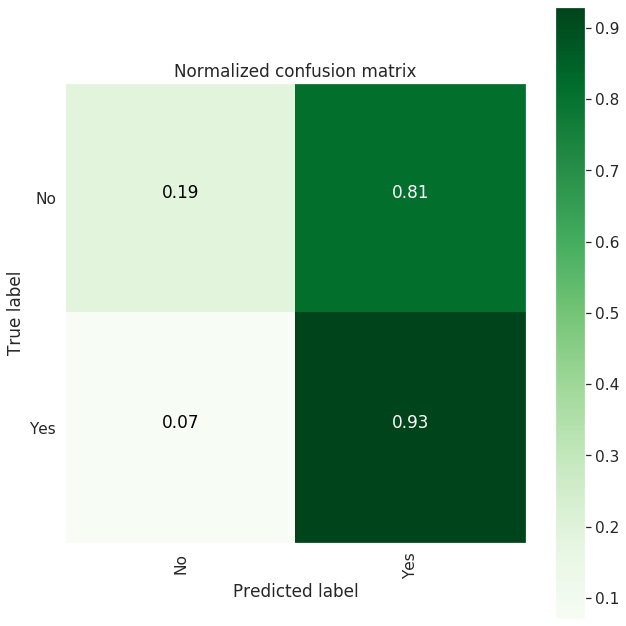

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.19      0.30      2227
           1       0.45      0.93      0.60      1566

    accuracy                           0.49      3793
   macro avg       0.62      0.56      0.45      3793
weighted avg       0.65      0.49      0.43      3793



In [106]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

In [107]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 8, 'gamma': 2}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.6999839692209041



### Decision Tree with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:00.224999


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.002001


---------------------
|      Accuracy      |
---------------------

    0.6867914579488531


---------------------
|      f1_score      |
---------------------

    0.6455847255369928


--------------------
| Confusion Matrix |
--------------------

 [[1523  704]
 [ 484 1082]]


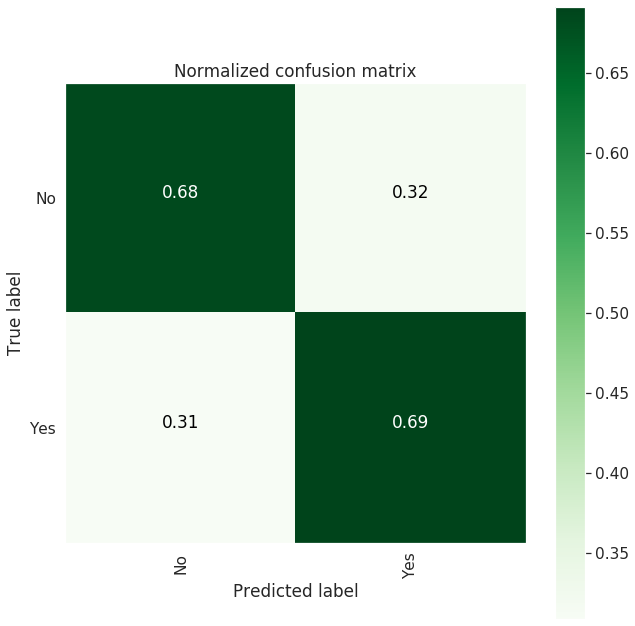

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      2227
           1       0.61      0.69      0.65      1566

    accuracy                           0.69      3793
   macro avg       0.68      0.69      0.68      3793
weighted avg       0.70      0.69      0.69      3793

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimat

In [111]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(dt_grid_results['model'])

In [112]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.6878807310035268



In [113]:
#Random Forest with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:34.146021


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.063967


---------------------
|      Accuracy      |
---------------------

    0.6925916161349855


---------------------
|      f1_score      |
---------------------

    0.673389355742297


--------------------
| Confusion Matrix |
--------------------

 [[1425  802]
 [ 364 1202]]


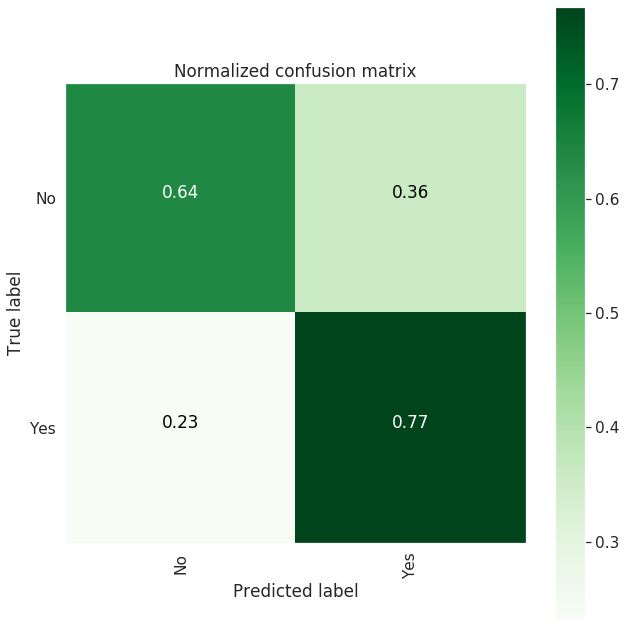

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.80      0.64      0.71      2227
           1       0.60      0.77      0.67      1566

    accuracy                           0.69      3793
   macro avg       0.70      0.70      0.69      3793
weighted avg       0.72      0.69      0.69      3793

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=13, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

----------------------

In [114]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(rfc_grid_results['model'])

### Gradient Boosting with Grid Search

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:01:15.668046


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.019998


---------------------
|      Accuracy      |
---------------------

    0.7044555760611653


---------------------
|      f1_score      |
---------------------

    0.6779661016949152


--------------------
| Confusion Matrix |
--------------------

 [[1492  735]
 [ 386 1180]]


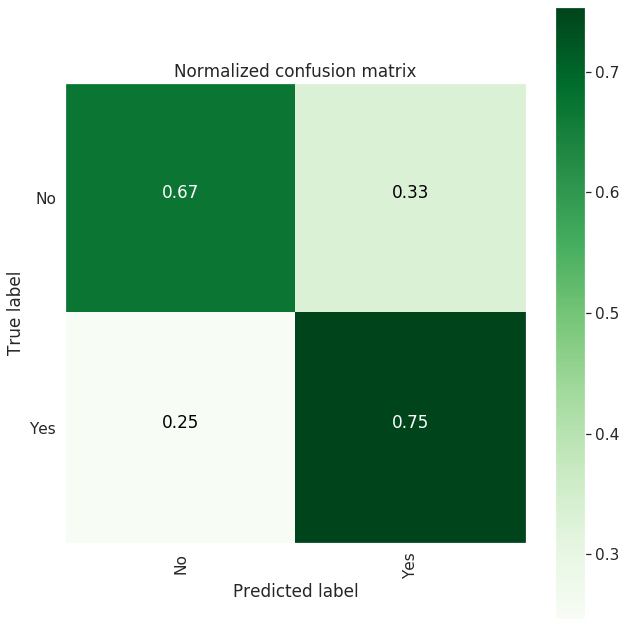

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      2227
           1       0.62      0.75      0.68      1566

    accuracy                           0.70      3793
   macro avg       0.71      0.71      0.70      3793
weighted avg       0.72      0.70      0.71      3793

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='auto',
                 

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

In [125]:
## Xgboost

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:20.966037


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.016998


---------------------
|      Accuracy      |
---------------------

    0.6767730029000791


---------------------
|      f1_score      |
---------------------

    0.6528878822197055


--------------------
| Confusion Matrix |
--------------------

 [[1414  813]
 [ 413 1153]]


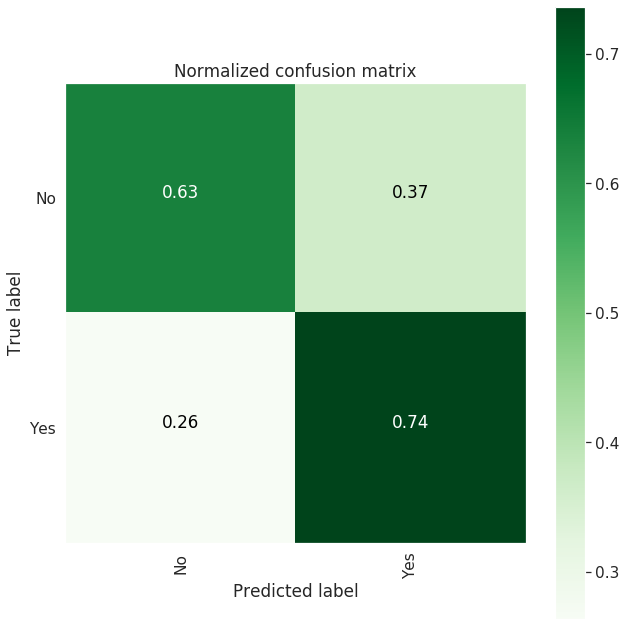

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           0       0.77      0.63      0.70      2227
           1       0.59      0.74      0.65      1566

    accuracy                           0.68      3793
   macro avg       0.68      0.69      0.68      3793
weighted avg       0.70      0.68      0.68      3793

--------------------------
|      Best Estimator     |
--------------------------

	XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1,
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

--------------------------
|     Best p

In [126]:
from xgboost import XGBClassifier
param_grid = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1],
        'subsample': [0.6],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }

xgboost = XGBClassifier(learning_rate=0.02, n_estimators=100, objective='binary:logistic',
                    silent=True, nthread=1)

xgboost_grid = GridSearchCV(xgboost, param_grid=param_grid, n_jobs=-1)
xgboost_grid_results = perform_model(xgboost_grid, X_train, y_train, X_test, y_test, class_labels=labels)
print_grid_search_attributes(xgboost_grid_results['model'])

### Compare Results

In [127]:
print('\n                     Accuracy  F1-score    Error')
print('                 ----------  ---------  --------')
print('Logistic Regression : {:.04}%     {:.04}%    {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                           log_reg_grid_results['f1_score'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%    {:.04}%     {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                            lr_svc_grid_results['f1_score'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%    {:.04}%    {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                           rbf_svm_grid_results['f1_score'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%    {:.04}%    {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                           dt_grid_results['f1_score'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%    {:.04}%    {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           rfc_grid_results['f1_score'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))

print('GradientBoosting DT : {:.04}%    {:.04}%    {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                                    rfc_grid_results['f1_score'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))
print('Xgboost             : {:.04}%    {:.04}%    {:.04}% '.format(xgboost_grid_results['accuracy'] * 100,\
                                                                    xgboost_grid_results['f1_score'] * 100,\
                                                        100-(xgboost_grid_results['accuracy'] * 100)))


                     Accuracy  F1-score    Error
                 ----------  ---------  --------
Logistic Regression : 64.3%     64.14%    35.7%
Linear SVC          : 63.54%    63.5%     36.46% 
rbf SVM classifier  : 49.33%    60.22%    50.67% 
DecisionTree        : 68.68%    64.56%    31.32% 
Random Forest       : 69.26%    67.34%    30.74% 
GradientBoosting DT : 69.26%    67.34%    30.74% 
XGBOOST             : 67.68%    65.29%    32.32% 


# 5 Conclusion

Our model provides an indication of which users are likely to churn. I have purposely left the date of the expected churn open-ended.The reason we are not aiming to create new products for people who are going to leave us for sure, but for people who are starting to lose interest in the app.

I would like to include the time it takes for churn - Survival analysis in the next project with possibly different data set to showcase different acceptance of problem-solving skills. Also,  we have open-ended emphasis to get a sense of bit-likely customer likely to churn.